In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
dataFrames = ['TABLICA_0' + str(i) + '.csv' for i in range(5)]

industrial_index = pd.read_csv(dataFrames[0], sep = ';')

construction_index = pd.read_csv(dataFrames[1], sep = ';')

retail_index = pd.read_csv(dataFrames[2], sep = ';')

shipping_index = pd.read_csv(dataFrames[3], sep = ';')

gastronomy_index = pd.read_csv(dataFrames[4], sep = ';')

In [3]:
sorted_industrial_index = industrial_index.sort_values(by = ['Szereg czasowy', 'Zmienna'])

sorted_construction_index = construction_index.sort_values(by = ['Szereg czasowy', 'Zmienna'])

sorted_retail_index = retail_index.sort_values(by = ['Szereg czasowy', 'Zmienna'])

sorted_shipping_index = shipping_index.sort_values(by = ['Szereg czasowy', 'Zmienna'])

sorted_gastronomy_index = gastronomy_index.sort_values(by = ['Szereg czasowy', 'Zmienna'])

In [4]:
full_index = sorted_industrial_index

full_index['CONSTRUCTION'] = sorted_construction_index['Wartość']

full_index['RENTAL'] = sorted_retail_index['Wartość']

full_index['SHIPPING'] = sorted_shipping_index['Wartość']

full_index['GASTRONOMY'] = sorted_gastronomy_index['Wartość']

In [5]:
full_index['YEAR'] = full_index['Szereg czasowy'].str.split(pat = ' ', expand = True)[0]

full_index['MONTH'] = full_index['Szereg czasowy'].str.split(pat = ' ', expand = True)[1]

for row in full_index['MONTH']:
    if row == 'M01':
        full_index['MONTH'] = full_index['MONTH'].replace(['M01'], ['01'])
    elif row == 'M02':
        full_index['MONTH'] = full_index['MONTH'].replace(['M02'], ['02'])
    elif row == 'M03':
        full_index['MONTH'] = full_index['MONTH'].replace(['M03'], ['03'])
    elif row == 'M04':
        full_index['MONTH'] = full_index['MONTH'].replace(['M04'], ['04'])
    elif row == 'M05':
        full_index['MONTH'] = full_index['MONTH'].replace(['M05'], ['05'])
    elif row == 'M06':
        full_index['MONTH'] = full_index['MONTH'].replace(['M06'], ['06'])
    elif row == 'M07':
        full_index['MONTH'] = full_index['MONTH'].replace(['M07'], ['07'])
    elif row == 'M08':
        full_index['MONTH'] = full_index['MONTH'].replace(['M08'], ['08'])
    elif row == 'M09':
        full_index['MONTH'] = full_index['MONTH'].replace(['M09'], ['09'])
    elif row == 'M10':
        full_index['MONTH'] = full_index['MONTH'].replace(['M10'], ['10'])
    elif row == 'M11':
        full_index['MONTH'] = full_index['MONTH'].replace(['M11'], ['11'])
    else:
        full_index['MONTH'] = full_index['MONTH'].replace(['M12'], ['12'])

full_index['DATE'] = full_index['YEAR'].str.cat(full_index['MONTH'], sep = '-')

In [6]:
col_rename_1 = {'Zmienna': 'PROSPERITY INDEX',
                'Jednostka terytorialna': 'TERRITORY',
                'Wartość': 'INDUSTRIAL'}

col_drop_1 = ['Typ informacji', 'PKD - wybrane sekcje i działy 1 (KG)', 'Szereg czasowy', 'Flaga', 'YEAR', 'MONTH']

col_reindex_1 = ['TERRITORY', 'DATE', 'PROSPERITY INDEX', 'INDUSTRIAL', 'CONSTRUCTION', 'RENTAL', 'SHIPPING', 'GASTRONOMY']

full_index = full_index.rename(columns = col_rename_1).drop(columns = col_drop_1).reindex(columns = col_reindex_1)

for row in full_index['PROSPERITY INDEX']:
    if row == 'Bieżąca ogólna sytuacja gospodarcza przedsiębiorstwa':
        full_index['PROSPERITY INDEX'] = full_index['PROSPERITY INDEX'].replace('Bieżąca ogólna sytuacja gospodarcza przedsiębiorstwa', 'Current Situation')
    elif row == 'Przewidywana ogólna sytuacja gospodarcza przedsiębiorstwa':
        full_index['PROSPERITY INDEX'] = full_index['PROSPERITY INDEX'].replace('Przewidywana ogólna sytuacja gospodarcza przedsiębiorstwa', 'Anticipated Situation')
    else:
        full_index['PROSPERITY INDEX'] = full_index['PROSPERITY INDEX'].replace('Wskaźnik ogólnego klimatu koniunktury', 'General Climate')

for row in full_index['TERRITORY']:
    full_index['TERRITORY'] = full_index['TERRITORY'].replace(['POLSKA'], ['Poland'])

full_index = full_index.replace(',', '.', regex = True)

In [7]:
data_types_1 = {'INDUSTRIAL': 'float64',
                'CONSTRUCTION': 'float64',
                'RENTAL': 'float64',
                'SHIPPING': 'float64',
                'GASTRONOMY': 'float64'}

full_index = full_index.astype(data_types_1)

In [8]:
full_index.info()

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 279 to 26
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TERRITORY         300 non-null    object 
 1   DATE              300 non-null    object 
 2   PROSPERITY INDEX  300 non-null    object 
 3   INDUSTRIAL        300 non-null    float64
 4   CONSTRUCTION      300 non-null    float64
 5   RENTAL            300 non-null    float64
 6   SHIPPING          300 non-null    float64
 7   GASTRONOMY        300 non-null    float64
dtypes: float64(5), object(3)
memory usage: 21.1+ KB


In [9]:
agg_dict_1 = {'INDUSTRIAL': 'mean',
              'CONSTRUCTION': 'mean',
              'RENTAL': 'mean',
              'SHIPPING': 'mean',
              'GASTRONOMY': 'mean'}

agg_full_index = full_index.groupby(['TERRITORY', 'DATE', 'PROSPERITY INDEX']).agg(agg_dict_1)

agg_full_index.head(9)

INDUSTRIAL  CONSTRUCTION  RENTAL   
TERRITORY DATE    PROSPERITY INDEX                                          
Poland    2015-06 Anticipated Situation         8.9          -2.0     3.5  \
                  Current Situation             3.3         -10.4     1.4   
                  General Climate               6.1           6.5     2.5   
          2015-07 Anticipated Situation         7.7          -1.2     4.5   
                  Current Situation             3.9          -8.3     0.5   
                  General Climate               5.8           6.0     2.5   
          2015-08 Anticipated Situation         9.6          -0.9     4.9   
                  Current Situation             4.6          -5.6     3.9   
                  General Climate               7.1           3.8     4.4   

                                         SHIPPING  GASTRONOMY  
TERRITORY DATE    PROSPERITY INDEX                             
Poland    2015-06 Anticipated Situation       7.9        13.7  
                  Current Situation           3.4         7.7  
                  General Climate            -1.1         1.6  
          2015-07 Anticipated Situation       7.2        12.9  
                  Current Situation           3.3         9.0  
                  General Climate            -0.7         5.0  
          2015-08 Anticipated Situation       9.9         1.9  
                  Current Situation           7.4         5.6  
                  General Climate             4.9         9.3

In [10]:
mask_1 = full_index['PROSPERITY INDEX'] == 'Anticipated Situation'

mask_2 = full_index['PROSPERITY INDEX'] == 'Current Situation'

mask_3 = full_index['PROSPERITY INDEX'] == 'General Climate'

as_index = full_index[mask_1]

cs_index = full_index[mask_2]

gc_index = full_index[mask_3]

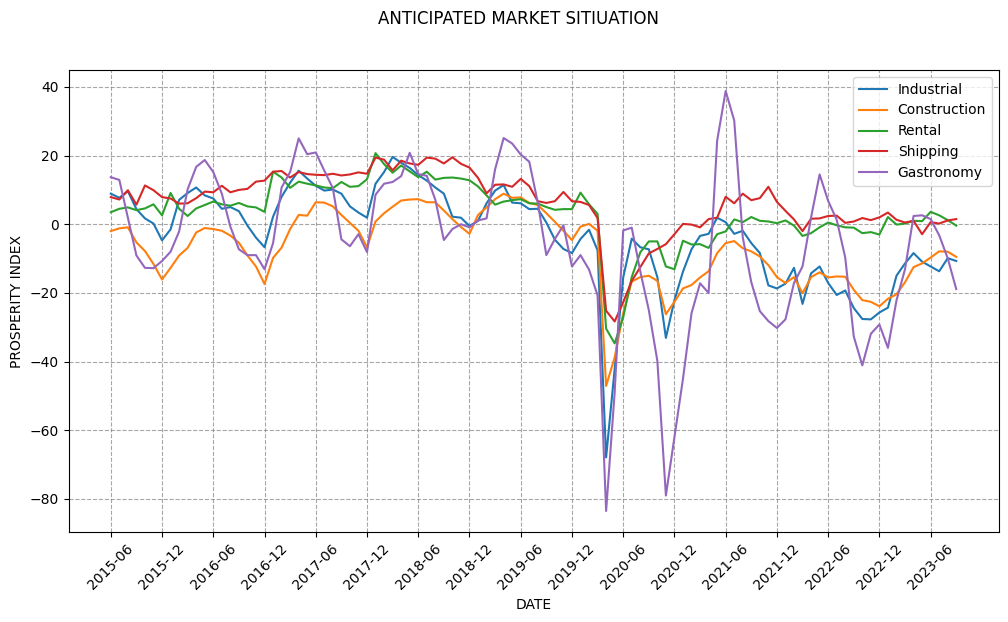

In [25]:
fig = plt.figure(figsize = (12, 6))

sns.lineplot(data = as_index,
             x = 'DATE',
             y = 'INDUSTRIAL',
             label = 'Industrial')
sns.lineplot(data = as_index,
             x = 'DATE',
             y = 'CONSTRUCTION',
             label = 'Construction')
sns.lineplot(data = as_index,
             x = 'DATE',
             y = 'RENTAL',
             label = 'Rental')
sns.lineplot(data = as_index,
             x = 'DATE',
             y = 'SHIPPING',
             label = 'Shipping')
sns.lineplot(data = as_index,
             x = 'DATE',
             y = 'GASTRONOMY',
             label = 'Gastronomy')

plt.grid(which='both', linestyle='--', color='gray', alpha=0.7)

plt.xticks(as_index['DATE'][::6], rotation=45)

plt.suptitle('ANTICIPATED MARKET SITIUATION')
plt.ylabel('PROSPERITY INDEX')

plt.legend()